# Daffa Razqa Dwinugraha - 0706022310034

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [86]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [87]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [88]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [89]:
df['Other names'].fillna('Montenegro', inplace=True)

C:\Users\Razqa\AppData\Local\Temp\ipykernel_20528\3948049832.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [90]:
import plotly.express as px

fig = px.choropleth(df,
                    locations="ISO 3166-1 alpha-3 CODE",
                    color="Continent",
                    hover_name="Country",
                    title="World Map of Countries by Continent",
                    projection="natural earth")
fig.show()

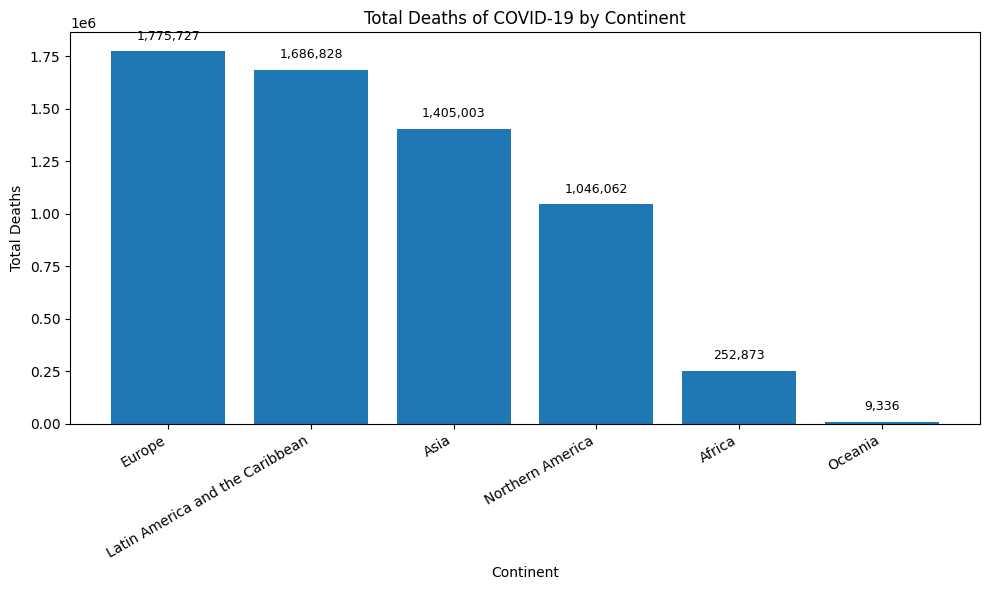

In [91]:
deaths_by_continent = (
    df.groupby("Continent", dropna=False)["Total Deaths"]
      .sum()
      .reset_index()
      .sort_values("Total Deaths", ascending=False)
      .reset_index(drop=True)
)

plt.figure(figsize=(10,6))
bars = plt.bar(deaths_by_continent["Continent"], deaths_by_continent["Total Deaths"])
plt.title("Total Deaths of COVID-19 by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=30, ha="right")


for bar in bars:
    height = bar.get_height()
    plt.annotate(f"{int(height):,}",
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 6),  
                 textcoords="offset points",
                 ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

World Map of Countries by Continent
- Peta ini menunjukkan distribusi negara berdasarkan benua untuk memvisualisasikan persebaran geografis dataset. Setiap benua ditandai dengan warna yang berbeda sehingga memudahkan identifikasi pola regional secara visual.

Total Deaths of COVID-19 by Continent (Bar Chart)
- Grafik batang ini memperlihatkan total kematian COVID-19 yang dijumlahkan per benua. Dari grafik terlihat bahwa Eropa mencatat jumlah kematian tertinggi, diikuti oleh Latin America & the Caribbean serta Asia, menunjukkan wilayah dengan dampak pandemi paling besar

In [92]:
from sklearn.preprocessing import OrdinalEncoder
import pprint

df_encoded = df.copy()

nominal_cols = ['Country',
                'Other names',
                'ISO 3166-1 alpha-3 CODE',''
                'Continent']

encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols]) 

encode_dict = {}

for col, cats in zip(nominal_cols,encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5},
 'Country': {'Afghanistan': 0,
             'Albania': 1,
             'Algeria': 2,
             'Andorra': 3,
             'Angola': 4,
             'Anguilla': 5,
             'Antigua and Barbuda': 6,
             'Argentina': 7,
             'Armenia': 8,
             'Aruba': 9,
             'Australia': 10,
             'Austria': 11,
             'Azerbaijan': 12,
             'Bahamas': 13,
             'Bahrain': 14,
             'Bangladesh': 15,
             'Barbados': 16,
             'Belarus': 17,
             'Belgium': 18,
             'Belize': 19,
             'Benin': 20,
             'Bermuda': 21,
             'Bhutan': 22,
             'Bolivia': 23,
             'Bosnia and Herzegovina': 24,
             'Botswana': 25,
             'Brazil': 26,
             'B

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
155,155.0,153.0,159.0,4433639,3.0,765213,8170,172593,1843,1.067677
208,208.0,206.0,195.0,39634,3.0,5910,36,149114,908,0.609137
168,168.0,168.0,177.0,6109,0.0,2,0,327,0,0.000000
205,205.0,203.0,202.0,1407422,3.0,138425,3756,98354,2669,2.713383
100,100.0,55.0,38.0,27520953,0.0,81761,796,2971,29,0.973569


# K-Means

In [93]:
from sklearn.preprocessing import StandardScaler
features = df_encoded.copy()
feature2 = df_encoded.copy() # buat hirerical

X_unscaled = features.values
scaler = StandardScaler()

X_scaled = scaler.fit_transform(features)

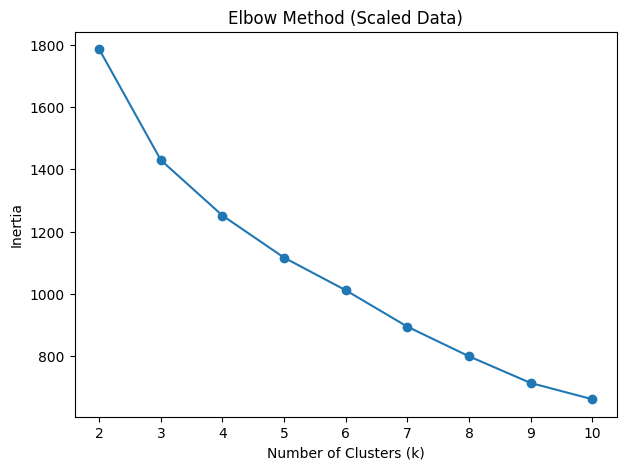

In [94]:
from sklearn.cluster import KMeans
inertia_list = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia_list, marker='o')
plt.title("Elbow Method (Scaled Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [95]:
k = 3
kmeans_unscaled = KMeans(n_clusters=k,random_state=42,n_init=10)
kmeans_scaled = KMeans(n_clusters=k,random_state=42,n_init=10)

clusters_unscaled = kmeans_unscaled.fit_predict(X_unscaled)
clusters_scaled = kmeans_scaled.fit_predict(X_scaled)

df['Cluster_Unscaled'] = clusters_unscaled
df['Cluster_Scaled']   = clusters_scaled

df_encoded['Cluster_Unscaled'] = clusters_unscaled
df_encoded['Cluster_Scaled']   = clusters_scaled

In [96]:
cluster_summary = df_encoded.groupby('Cluster_Unscaled').agg(['mean', 'median', 'min', 'max'])
cluster_summary

Country                     Other names               \
                        mean median   min    max        mean median   min   
Cluster_Unscaled                                                            
0                 112.019048  112.5   0.0  224.0  111.947619  112.5   0.0   
1                  67.000000   67.0  42.0   92.0   68.500000   68.5  41.0   
2                 118.615385  130.0  15.0  219.0  119.538462  131.0  15.0   

                        ISO 3166-1 alpha-3 CODE         ... Tot Deaths/1M pop  \
                    max                    mean median  ...               min   
Cluster_Unscaled                                        ...                     
0                 224.0              111.928571  112.5  ...                 0   
1                  96.0               66.000000   66.0  ...                 3   
2                 218.0              120.230769  131.0  ...                15   

                       Death percentage                                 \
                   max             mean    median       min        max   
Cluster_Unscaled                                                         
0                 6286         1.396774  0.975096  0.000000  18.151787   
1                  371         2.104518  2.104518  1.211712   2.997325   
2                 3068         2.107418  1.612807  0.424537   5.705041   

                 Cluster_Scaled                 
                           mean median min max  
Cluster_Unscaled                                
0                      0.504762    1.0   0   1  
1                      1.000000    1.0   0   2  
2                      0.769231    1.0   0   2  

[3 rows x 44 columns]

In [97]:
from sklearn.metrics import silhouette_score
inertia_unscaled = kmeans_unscaled.inertia_
inertia_scaled = kmeans_scaled.inertia_

sil_unscaled = silhouette_score(X_unscaled, clusters_unscaled)
sil_scaled = silhouette_score(X_scaled,clusters_scaled)

print("Inertia (Unscaled) :", inertia_unscaled)
print("Inertia (Scaled)   :", inertia_scaled)
print("Silhouette (Unscaled):", sil_unscaled)
print("Silhouette (Scaled):", sil_scaled)

Inertia (Unscaled) : 1.516502840866549e+17
Inertia (Scaled)   : 1429.5040981428942
Silhouette (Unscaled): 0.8481773888181707
Silhouette (Scaled): 0.24921017211332683


In [98]:
# Fit K-Means to the data with the optimal number of K cluster = 2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_encoded)

# Add the cluster labels to the DataFrame
df_encoded['KMeans_Cluster'] = clusters

# Show the df
df_encoded.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Cluster_Unscaled,Cluster_Scaled,KMeans_Cluster
0,0.0,0.0,1.0,40462186,1.0,177827,7671,4395,190,4.313743,0,0,0
1,1.0,1.0,4.0,2872296,2.0,273870,3492,95349,1216,1.275058,0,0,0
2,2.0,2.0,57.0,45236699,0.0,265691,6874,5873,152,2.587216,0,0,0
3,3.0,3.0,5.0,77481,2.0,40024,153,516565,1975,0.382271,0,0,0
4,4.0,4.0,2.0,34654212,0.0,99194,1900,2862,55,1.915438,0,0,0


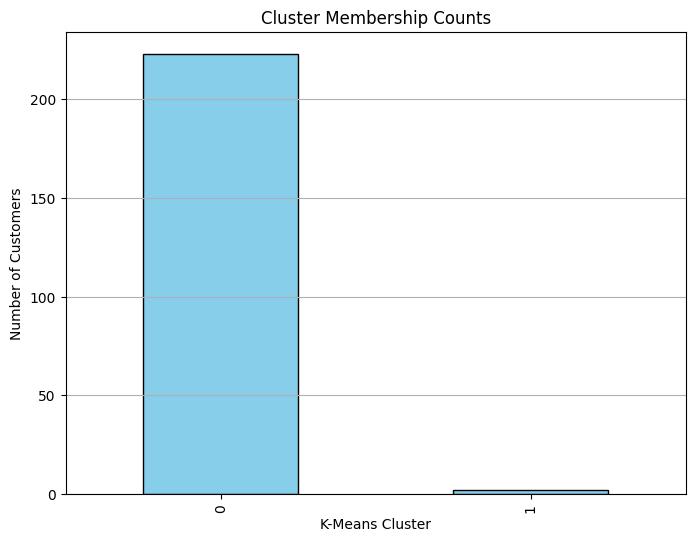

In [99]:
cluster_counts = df_encoded['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

# Hierarchical Agglomerative Clustering

In [100]:
sc = StandardScaler()
df_scaled = df.copy()

# Pilih kolom numerik yang relevan untuk scaling
selected_cols = [
        'Death percentage',
        'Tot\xa0Cases//1M pop',	
        'Tot\xa0Deaths/1M pop'
]

df_scaled_values = sc.fit_transform(df[selected_cols])
df_scaled = pd.DataFrame(df_scaled_values, columns=selected_cols)

# Lihat hasil
df_scaled.head()

,Death percentage,Tot Cases//1M pop,Tot Deaths/1M pop
0,1.651243,-0.915487,-0.759994
1,-0.097285,-0.287081,0.099982
2,0.657760,-0.905275,-0.791845
3,-0.611015,2.623123,0.736164
4,0.271204,-0.926078,-0.873149


In [101]:
print(df.columns.tolist())

['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population', 'Continent', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage', 'Cluster_Unscaled', 'Cluster_Scaled']


In [102]:
# get stastical information on the new dataset
df_scaled.describe()

,Death percentage,Tot Cases//1M pop,Tot Deaths/1M pop
count,2.250000e+02,2.250000e+02,2.250000e+02
mean,2.131628e-16,7.894919e-17,4.736952e-17
std,1.002230e+00,1.002230e+00,1.002230e+00
min,-8.309821e-01,-9.457898e-01,-9.192494e-01
25%,-5.367737e-01,-8.671993e-01,-8.161528e-01
50%,-2.343236e-01,-3.310361e-01,-3.258152e-01
75%,3.066382e-01,5.971815e-01,5.852909e-01
max,9.613966e+00,3.863153e+00,4.349575e+00


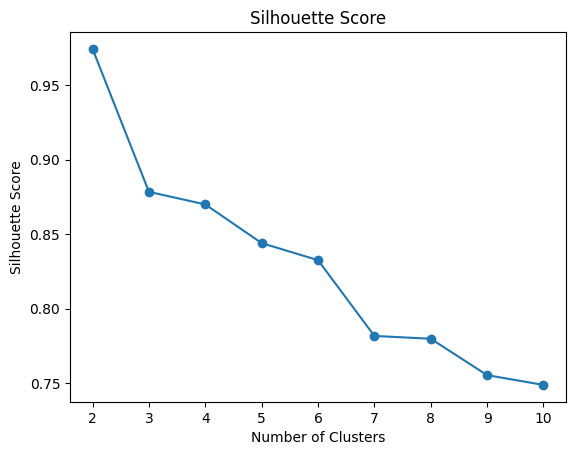

In [103]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='manhattan')
    cluster_labels = agglo_model.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


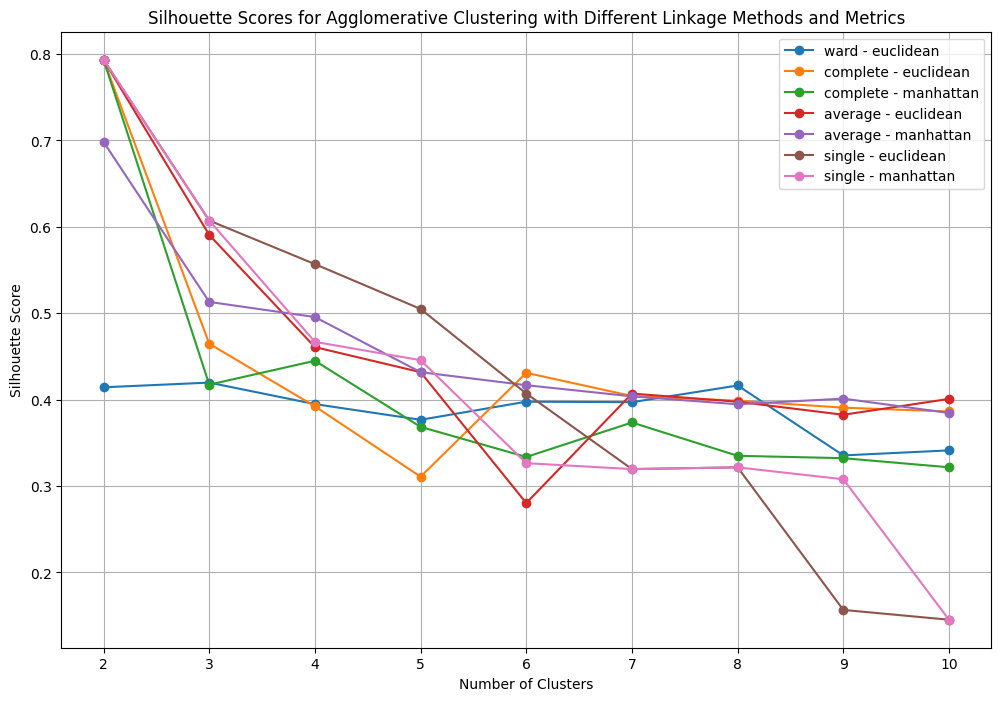

Best Silhouette Score: 0.7935045287443472
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [104]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [105]:
# Hierarchical Clustering
agglo1 = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)
y_hc1 = agglo1.fit_predict(df_scaled)

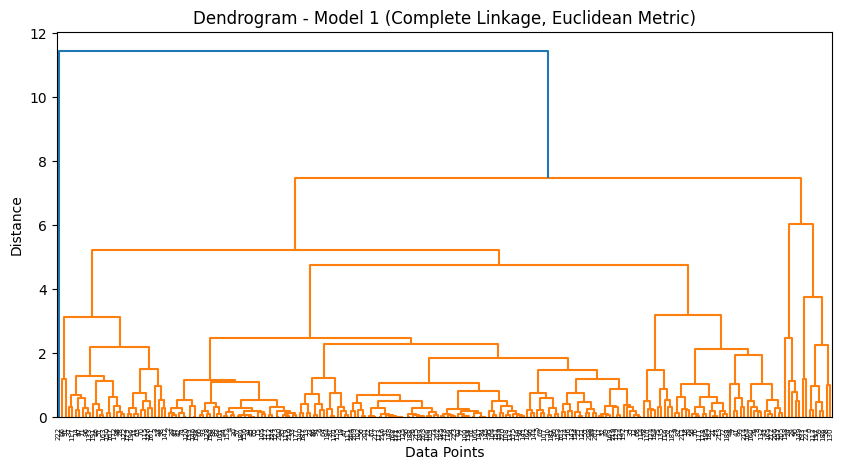

In [106]:
# Dendrogram - Model 1 (Best Parameters)
plt.figure(figsize=(10, 5))
Z1 = linkage(df_scaled, method=best_linkage, metric=best_metric)
dendrogram(Z1)
plt.title(f'Dendrogram - Model 1 ({best_linkage.title()} Linkage, {best_metric.title()} Metric)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [107]:
print("Agglomerative Clustering Models fitted successfully.")
print(f"Model 1 → {best_linkage} linkage, {best_metric} metric, {n_clusters} clusters.")

Agglomerative Clustering Models fitted successfully.
Model 1 → complete linkage, euclidean metric, 10 clusters.


In [108]:
df_scaled['Agglo'] = y_hc1

In [109]:
df_scaled.head()

,Death percentage,Tot Cases//1M pop,Tot Deaths/1M pop,Agglo
0,1.651243,-0.915487,-0.759994,0
1,-0.097285,-0.287081,0.099982,0
2,0.657760,-0.905275,-0.791845,0
3,-0.611015,2.623123,0.736164,0
4,0.271204,-0.926078,-0.873149,0


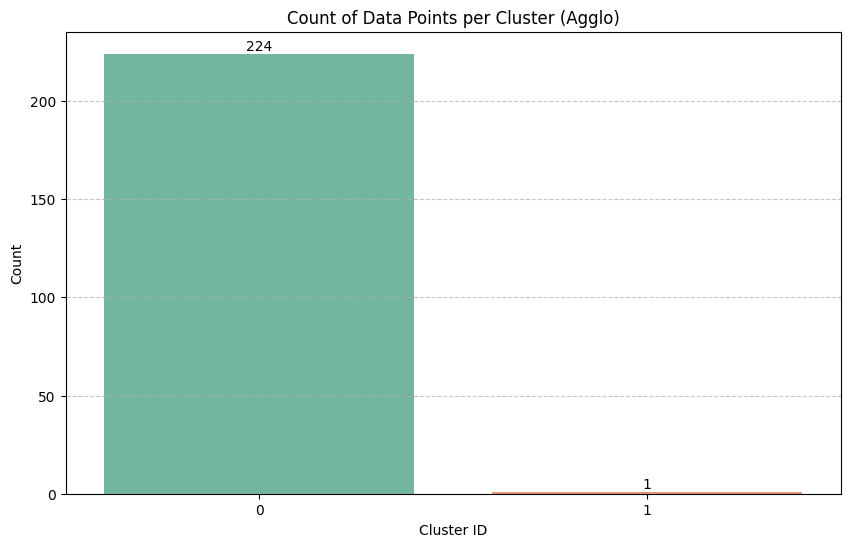

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_scaled['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Adanya pemisahan yang jelas antara Cluster 0 (mayoritas) dan Cluster 1 (minoritas) mengindikasikan bahwa terdapat dua pola besar respons atau dampak pandemi yang signifikan di antara negara-negara di dunia.
- Untuk mengetahui karakteristik pastinya, perlu dilakukan analisis rata-rata (mean) dari fitur-fitur penting seperti Total Deaths/1M pop dan Death percentage untuk setiap cluster.

rekomendasi:
- Pengambilan Kebijakan yang Spesifik: Hasil clustering memungkinkan organisasi kesehatan global atau pemerintah untuk merancang kebijakan dan alokasi sumber daya yang ditargetkan (targeted intervention). Misalnya, Cluster 1 yang ekstrem dapat menjadi prioritas utama untuk mendapatkan bantuan vaksin, peralatan medis, atau tracing yang lebih intensif.

- Identifikasi Faktor Keberhasilan/Kegagalan: Cluster 0 dan Cluster 1 dapat digunakan sebagai kelompok studi untuk mengidentifikasi faktor-faktor non-medis (seperti PDB, kepadatan populasi, atau sistem kesehatan) yang mungkin berkorelasi dengan respons atau tingkat keparahan pandemi.